# Synoptic exercises

It's time to **plot**.

**1.** The **mean activity** of ions in solution can be measured experimentally. You have been provided with the mean activity of Na$_{2}$SO$_{4}$ at $298\,$K for a range of ionic strengths:

```python
ionic_strength = [0.000, 0.003, 0.006, 0.015, 0.030, 0.060, 0.150, 0.300, 0.600, 1.500, 3.000, 6.000]
mean_activity = [1, 0.886, 0.846, 0.777, 0.712, 0.637, 0.529, 0.446, 0.366, 0.268, 0.204, 0.155]
```

a) Use `matplotlib` to render a scatter plot of the mean activity as a function of the ionic strength $I$.

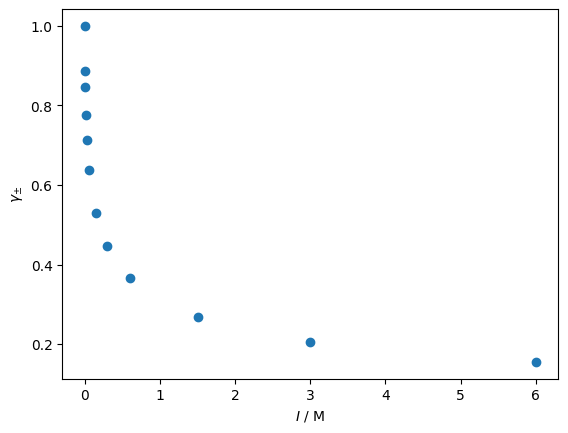

In [51]:
import matplotlib.pyplot as plt
import numpy as np

ionic_strength = np.array([0.000, 0.003, 0.006, 0.015, 0.030, 0.060, 0.150, 0.300, 0.600, 1.500, 3.000, 6.000])
mean_activity = np.array([1, 0.886, 0.846, 0.777, 0.712, 0.637, 0.529, 0.446, 0.366, 0.268, 0.204, 0.155])

plt.plot(ionic_strength, mean_activity, 'o')
plt.xlabel('$I$ / M')
plt.ylabel(r'$\gamma_{\pm}$')

plt.show()

b) The mean activity can be predicted by the Debye-Huckel limiting law:

$$\ln\gamma_{\pm} = -|z_{+}z_{-}|A\sqrt{I},$$

where $z_{+}$ and $z_{-}$ are the charges of the cations and anions, $I$ is the ionic strength and $A$ is a solvent and temperature dependent constant.

Write a function to calculate the mean activity according to the Debye-Huckel limiting law (feel free to reuse your code from [previous exercises](../lab_4/functions.ipynb)). Using $A = 1.179\,$M$^{\frac{1}{2}}$, plot the Debye-Huckel mean activity from $I = 0\,$M to $I = 6\,$M and compare this with the experimental values.

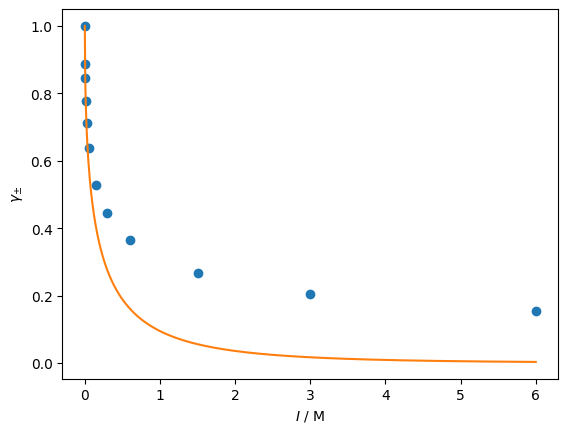

In [52]:
def debye_huckel(I, z_plus, z_minus, A):
    return np.exp(-abs(z_plus * z_minus) * A * np.sqrt(I))

I_dh = np.linspace(0, 6, 1000)
gamma_dh = debye_huckel(I_dh, 1, -2, 1.179)

plt.plot(ionic_strength, mean_activity, 'o')
plt.plot(I_dh, gamma_dh)
plt.xlabel('$I$ / M')
plt.ylabel(r'$\gamma_{\pm}$')

plt.show()

c) There are several extensions of the Debye-Huckel limiting law that aim to improve its description of the mean activity outside of the dilute limit. One such extension is:

$$\ln\gamma_{\pm} = -|z_{+}z_{-}|\frac{A\sqrt{I}}{1 + Ba_{0}\sqrt{I}},$$

where $B$ is another solvent and temperature dependent constant and $a_{0}$ is the distance of closest approach (expected to be proportional to the closest distance between ions in solution).

Write a function to calculate the mean activity according to the extended Debye-Huckel limiting law. Using $B = 18.3$ and $a_{0} = 0.071$, plot the extended Debye-Huckel mean activity from $I = 0\,$M to $I = 6\,$M and compare this with the experimental values and the original Debye-Huckel limiting law.

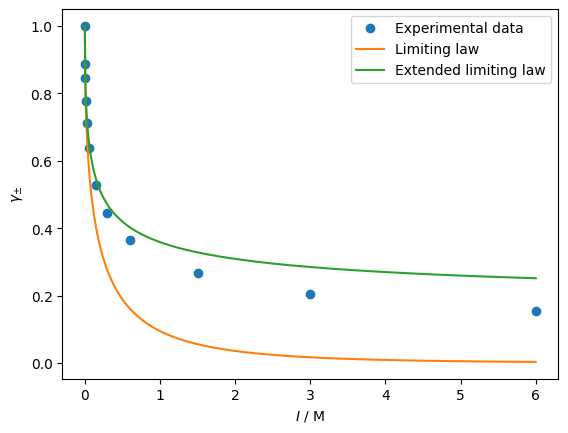

In [53]:
def debye_huckel_extended(I, z_plus, z_minus, A, B, a_0):
    return np.exp(-abs(z_plus * z_minus) * ((A * np.sqrt(I)) / (1 + B * a_0 * np.sqrt(I))))

gamma_dhe = debye_huckel_extended(I_dh, 1, 2, 1.179, 18.3, 0.071)

plt.plot(ionic_strength, mean_activity, 'o', label='Experimental data')
plt.plot(I_dh, gamma_dh, label='Limiting law')
plt.plot(I_dh, gamma_dhe, label='Extended limiting law')
plt.xlabel('$I$ / M')
plt.ylabel(r'$\gamma_{\pm}$')

plt.legend()
plt.show()